<a href="https://colab.research.google.com/github/geunsu-jo/Hands-On-ML/blob/main/textbook_practice/03_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

사이킷런에서 읽은 데이터셋은 dictionary 구조를 가지고 있다.
- 데이터셋을 설명하는 DESCR 키
- 샘플을 행, 특성(feature)를 열로 구성된 배열 data 키
- 레이블 배열이 있는 target 키

In [8]:
X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)
print(28*28)

(70000, 784)
(70000,)
784


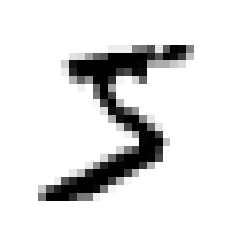

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit=X[0]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap="binary") # cmp="gray" 하면 높은 값을 밝게 하면서 색이 반전됨
plt.axis("off")
plt.show()

실제 레이블 확인

In [13]:
y[0]

'5'

정수로 변환

In [17]:
import numpy as np
y = y.astype(np.uint8)
y[0]

5

첫 6만개를 train으로, 나머지를 test로 나누기

In [18]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## 이진 분류기 훈련
문제 단순화를 위해, 5만 분류하는 모델

In [27]:
y_train_5 = (y_train == 5) # 5이면 True, 아니면 False
y_test_5 = (y_test == 5)
y_test_5[:3]

array([False, False, False])

사이킷런의 __SGDClassfier__ 클래스를 사용해 Stochastic Gradient Descent 적용(하나의 샘플을 독립적으로 처리)

In [28]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)